# WeatherPy

---

### *Code to Generate Random Geographic Coordinates and a List of Cities*

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the initial code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

In [5]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Set units of measurement
units = "imperial"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | katsuura
Processing Record 3 of Set 1 | bowen
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | mgandu
Processing Record 7 of Set 1 | mocambique
City not found. Skipping...
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | aukra
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | tessalit
Processing Record 13 of Set 1 | champerico
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | beringovskiy
Processing Record 18 of Set 1 | grand forks
Processing Record 19 of Set 1 | yar-sale
Processing Record 20 of Set 1 | itaituba
Processing Record 21 of Set 1 | thompson
Processing Record 22 of S

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,13.23,49,72,3.62,US,1675556353
1,katsuura,35.1333,140.3000,47.35,62,16,14.16,JP,1675556353
2,bowen,-20.0167,148.2333,82.31,82,92,8.10,AU,1675556354
3,qaanaaq,77.4840,-69.3632,-4.67,59,60,2.75,GL,1675556355
4,mgandu,-5.9500,34.1333,60.31,89,83,0.49,TZ,1675556356


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,13.23,49,72,3.62,US,1675556353
1,katsuura,35.1333,140.3000,47.35,62,16,14.16,JP,1675556353
2,bowen,-20.0167,148.2333,82.31,82,92,8.10,AU,1675556354
3,qaanaaq,77.4840,-69.3632,-4.67,59,60,2.75,GL,1675556355
4,mgandu,-5.9500,34.1333,60.31,89,83,0.49,TZ,1675556356


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

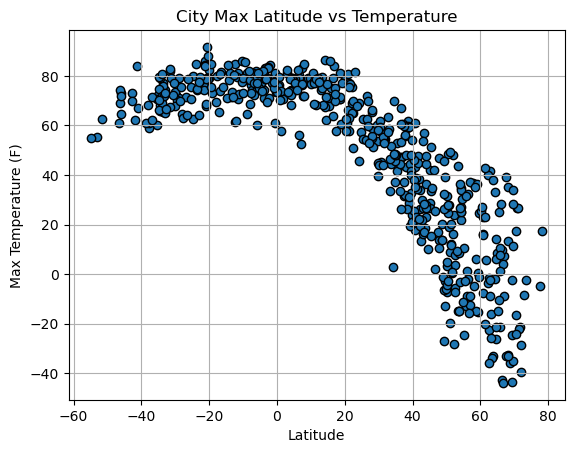

In [19]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Max Latitude vs Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

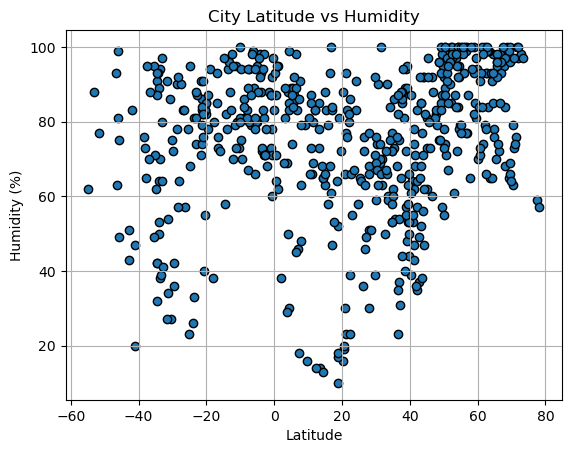

In [20]:
# Build scatter plot for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

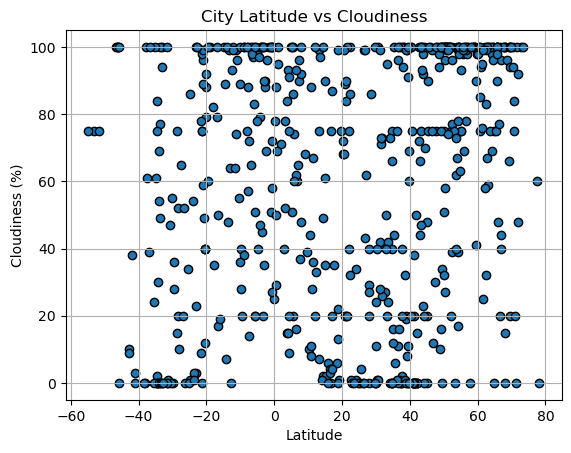

In [22]:
# Build scatter plot for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show() 

#### Latitude vs. Wind Speed Plot

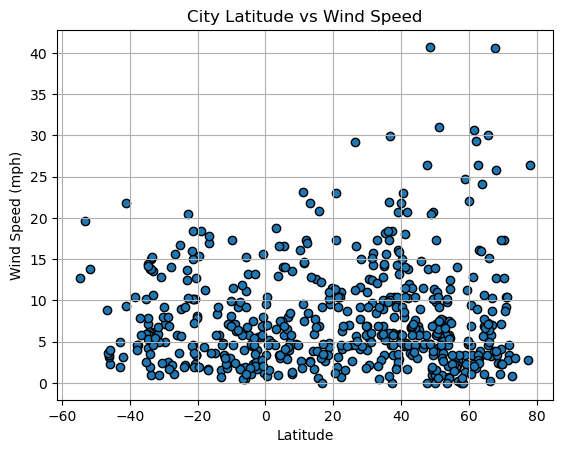

In [23]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show() 

---

## Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
def plot_regression(x_values, y_values, x_label, y_label, anno_x, anno_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_values, "red")
    plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, 
                 color="red", textcoords="offset points", xytext=(anno_x, anno_y))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.show()
    
    print(f"The r-value is: {rvalue}")

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,13.23,49,72,3.62,US,1675556353
1,katsuura,35.1333,140.3000,47.35,62,16,14.16,JP,1675556353
3,qaanaaq,77.4840,-69.3632,-4.67,59,60,2.75,GL,1675556355
6,nikolskoye,59.7035,30.7861,24.69,94,98,4.72,RU,1675556357
7,aukra,62.7925,6.9190,41.76,93,100,26.46,NO,1675556357


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bowen,-20.0167,148.2333,82.31,82,92,8.10,AU,1675556354
4,mgandu,-5.9500,34.1333,60.31,89,83,0.49,TZ,1675556356
5,bluff,-46.6000,168.3333,60.84,93,100,8.90,NZ,1675556356
8,punta arenas,-53.1500,-70.9167,55.51,88,75,19.57,CL,1675556087
11,rikitea,-23.1203,-134.9692,79.14,74,3,12.46,PF,1675556254


###  Temperature vs. Latitude Linear Regression Plot

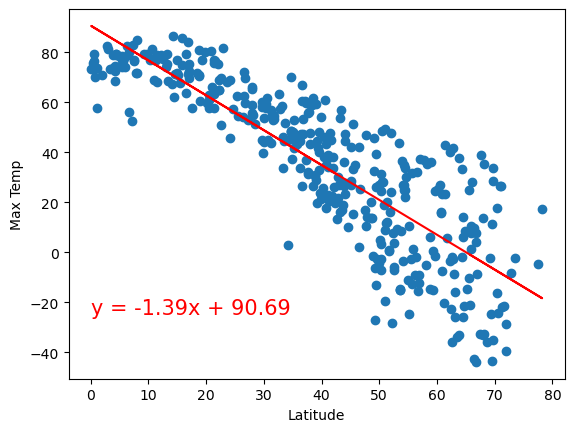

The r-value is: -0.8554204714261309


In [63]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_regression(x_values, y_values, "Latitude", "Max Temp", 0, -200)

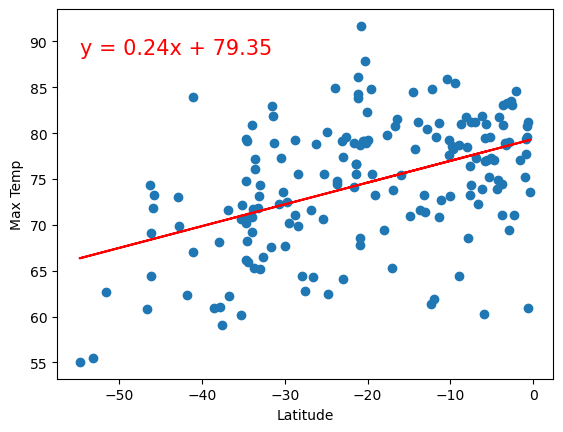

The r-value is: 0.45808902819965885


In [64]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_regression(x_values, y_values, "Latitude", "Max Temp", 0, -20)

* **For the Northern Hemisphere there is a strong negative linear relationship. As the latitude increases, the max temperature generally decreases.** 
* **For the Southern Hemisphere plot there is a weak positive linear relationship, though it borders on being a strong relationship as it is very close to 0.5. As the latitude increases, only somtimes does the max temperature increase as well.**
* **This seems to be an expected result as one would typically figure that two places on Earth, at very different latitudes, would expierence different max temperatures when observed at a relatively similar point in time.**

### Humidity vs. Latitude Linear Regression Plot

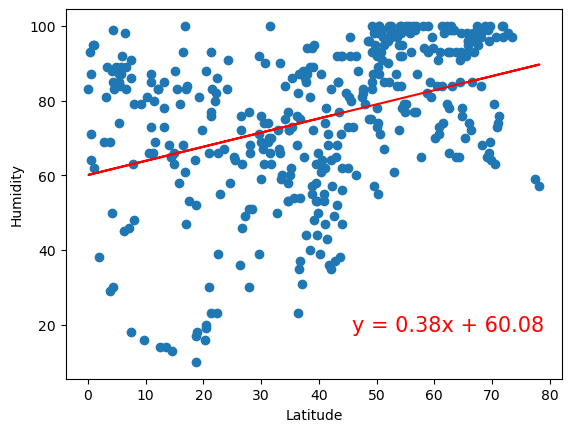

The r-value is: 0.3684656442480941


In [71]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_regression(x_values, y_values, "Latitude", "Humidity", 190, -220)

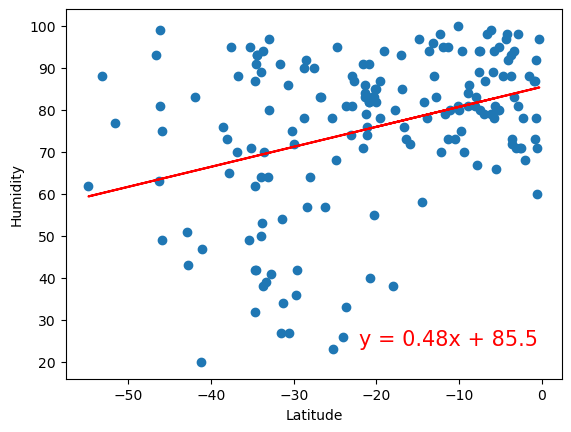

The r-value is: 0.35267477791094215


In [74]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_regression(x_values, y_values, "Latitude", "Humidity", 195, -230)

**Both of these relationships for the Northern and Southern hemispheres vs Humidity exhibit a weak positive relationship. There is little correlation between humidity and latitude for either hemisphere.** 

### Cloudiness vs. Latitude Linear Regression Plot

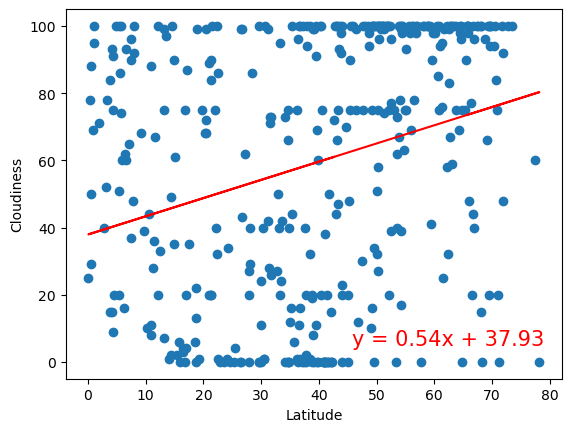

The r-value is: 0.28089023952237085


In [77]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_regression(x_values, y_values, "Latitude", "Cloudiness", 190, -230)

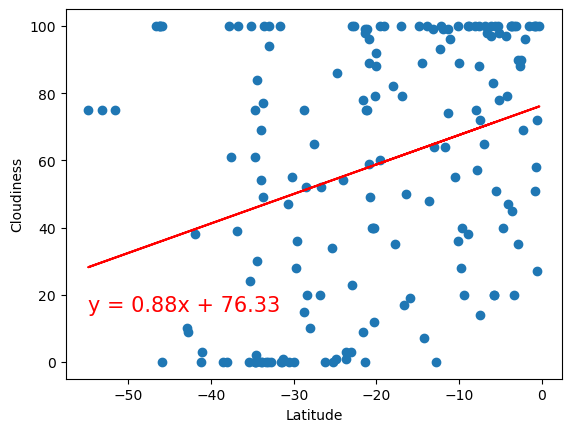

The r-value is: 0.31785045348237284


In [82]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_regression(x_values, y_values, "Latitude", "Cloudiness", 0, -205)

**Again, these linear relationships are a very weak positive one, just as the last ones were. There is practically no correlation between cloudiness and latitude for either hemisphere.**

### Wind Speed vs. Latitude Linear Regression Plot

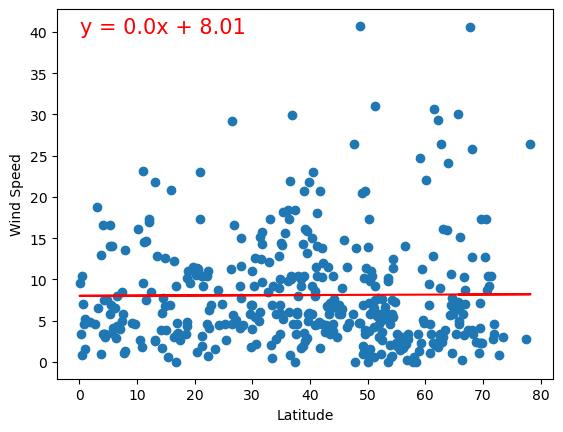

The r-value is: 0.007376165913784966


In [97]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_regression(x_values, y_values, "Latitude", "Wind Speed", 0, -5)

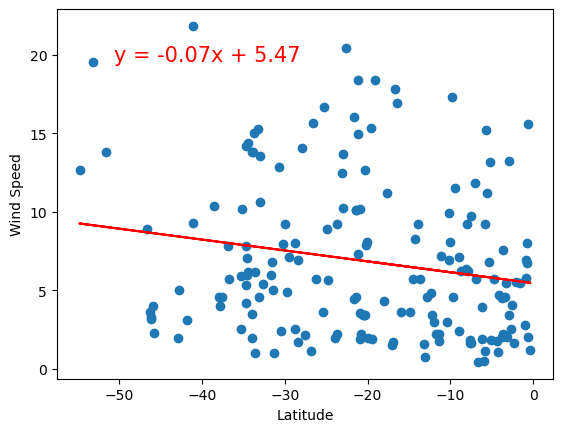

The r-value is: -0.19184657293721688


In [95]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_regression(x_values, y_values, "Latitude", "Wind Speed", 25, -25)

**With this final set of plots, we can see that there is a very minute positive and a very weak negative correlation for the Northern and Southern Hemispheres respectively vs Wind Speed. This is out weakest correlation (our lowest correlation coeffecient) and we can conclude that of the four factors studied, only temperature had a strong correlation with latitude.**